# 图像处理+180776+胡欣毅(Python版)
# 13周上课随堂任务

1. 不同方差、相关系数下二维高斯函数的图像
2. 不同方差、相关系数下二维高斯函数的平面投影特征(等高线图)
3. 二维高斯函数值的FFT特征
4. 门函数的能量分布
5. 小波初步

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import axes3d 
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import matplotlib as mpl

import cv2
import numpy as np

[画图](https://blog.csdn.net/hfutzhouyonghang/article/details/87855942)

$$ g_{\sigma _x,\sigma_y}(x,y) = \frac{1}{2\pi\left | \Sigma  \right |^{\frac{1}{2}} }\exp\left(-\frac{\begin{pmatrix} x& y\end{pmatrix}\Sigma ^{-1}\begin{pmatrix}x\\y\end{pmatrix}}{2}\right)$$

$$g(x, y)=\frac{1}{\left( 2 \pi \sigma_{1} \sigma_{2} \sqrt{1-\rho^{2}}\right)} \exp \left[-\frac{1}{2\left(1-\rho^{2}\right)}\left(\frac{\left(x-\mu_{1}\right)^{2}}{\sigma_{1}^{2}}-\frac{2 \rho\left(x-\mu_{1}\right)\left(y-\mu_{2}\right)}{\sigma_{1} \sigma_{2}}+\frac{\left(y-\mu_{2}\right)^{2}}{\sigma_{2}^{2}}\right)\right]$$

$$ g(x, y)=\frac{1}{\left( 2 \pi \sigma_{1} \sigma_{2} \sqrt{1-\rho^{2}}\right)} \exp \left[-\frac{\left(\sigma_{2}^{2} \left(x-\mu_{1}\right)^{2}-2 \sigma_{1} \sigma_{2}\rho\left(x-\mu_{1}\right)\left(y-\mu_{2}\right)+ \sigma_{1}^{2}\left(y-\mu_{2}\right)^{2}\right)}{2\left(1-\rho^{2}\right)\sigma_{1}^{2}\sigma_{2}^{2}}\right] $$

$$
\left( \begin{array}{ll}{a} & {b} \\ {c} & {d}\end{array}\right)^{-1}=\frac{1}{a d-b c} \left( \begin{array}{cc}{d} & {-b} \\ {-c} & {a}\end{array}\right)
$$

$$ \begin{bmatrix}
\sigma _1^2 &　\rho \sigma _1\sigma _2 \\ 
\rho \sigma _1\sigma _2 & \sigma _2^2
\end{bmatrix}^{-1} =  \frac{1}{\sigma _1^2\sigma _2^2 - \rho^2 \sigma _1^2\sigma _2^2}
\begin{bmatrix}
\sigma _2^2 &  -\rho \sigma _1\sigma _2\\ 
-\rho \sigma _1\sigma _2 & \sigma _1^2
\end{bmatrix}$$

In [2]:
sigma1 = 1
sigma2 = 2
ro = [-0.9 ,-0.4 , 0 , 0.4 , 0.9]

X = np.arange(-10, 10, 0.2)
Y = np.arange(-10, 10, 0.2)
X, Y = np.meshgrid(X, Y)
X_len,Y_len = len(X)//2 ,len(Y)//2

$$ \widehat{G}(\xi ,\eta ) = \exp\left(-2\pi^2(\sigma_1^2\xi ^2+\sigma_2^2\eta ^2 + 2\rho \sigma_1 \sigma_2\xi\eta )  \right ) $$ 

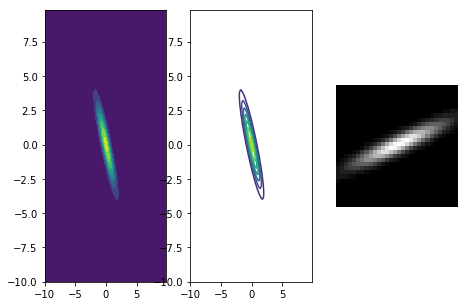

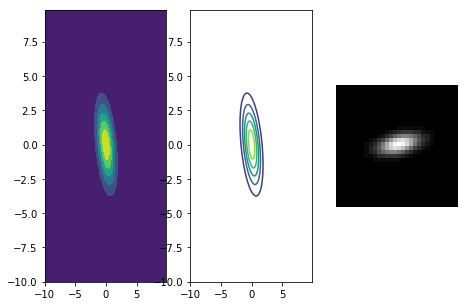

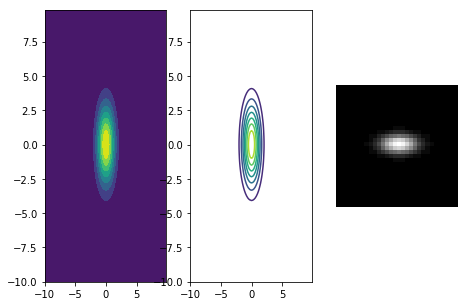

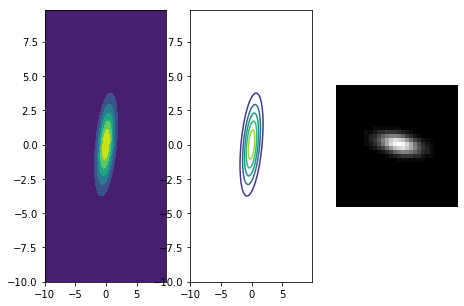

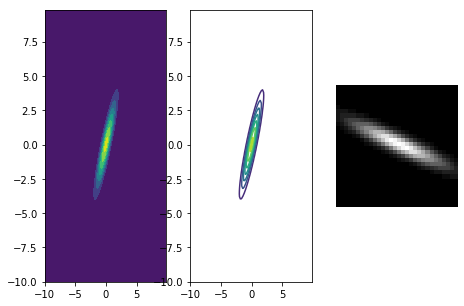

In [3]:
for i in range(len(ro)):
    rho = ro[i]
    Z = np.exp((-0.5)*((X*X)/(sigma1**2) + \
                    (Y*Y)/(sigma2**2) - \
                2*rho*(X*Y)/(sigma1*sigma2))/(1-rho**2) )\
                /(2*np.pi*sigma1*sigma2*np.sqrt(1-rho**2))
    
    G = np.exp(-2*(np.pi**2)*( (sigma1**2)*(X**2)  + \
                (sigma2**2)*(Y**2)  + 2*rho*(sigma1*sigma2)*(X*Y)  ))
    
    '''
    fig = plt.figure()      
    ax = Axes3D(fig)
    ax.plot_surface(X, Y, Z, rstride=1, cstride=1, alpha=0.5, cmap=cm.coolwarm)
    #plt.savefig("../"+str(i)+".pdf")
    plt.show()
    '''
    
    plt.figure(figsize=(10,5))
    plt.subplot(141)
    plt.contourf(X,Y,Z)
    
    plt.subplot(142)
    plt.contour(X,Y,Z)
    
    z = np.fft.fft2(Z)
    z = np.fft.fftshift(z)
    
    plt.subplot(143)
    plt.imshow(np.abs(z).astype(int)[X_len-15:X_len+15,\
        Y_len-15:Y_len+15],cmap="gray",origin='lower')
    plt.axis('off')  
    
    plt.show()

***rho从-1到1,等高线椭圆顺时针转***

## 小波初步

$$ \iint f(x,y) h(x-a,y-b) \exp\left( -2\pi i (x\xi+y\eta)　\right)dxdy $$

Gabor小波 $$  h(x-a,y-b) \exp\left( -2\pi i (x\xi+y\eta)　\right) $$

## 门函数的能量分布

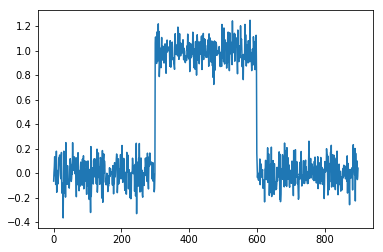

In [4]:
one = np.ones((1,300))
zero = np.zeros((1,300))
tmp = np.hstack((zero,one))
f = np.hstack((tmp,zero))[0]
fx = f + 0.1* np.random.normal(0, 1, len(f))
plt.figure()
plt.plot(fx)
plt.show()

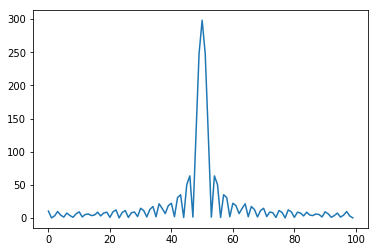

In [5]:
xfft = np.fft.fft2(fx.reshape(-1,1))
xfft = np.fft.fftshift(xfft)
plt.figure()
plt.plot(np.abs(xfft)[400:500])
plt.show()